Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [14]:

import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        print('chao')
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        print('hola')
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
#       # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)

Lavanderia UPS
chao
chao
chao
chao
chao
hola
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
hola
Llega vehiculo: Vehiculo-6 a la hora 5.00.
Removido  {68%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-2] lavado a las 8.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 8.00.
Removido  {72%} suciedad vehiculo => Vehiculo-1 
hola
Llega vehiculo: Vehiculo-7 a la hora 9.00.
Vehiculo [Vehiculo-1] lavado a las 9.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 9.00.
Removido  {82%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-3] lavado a las 10.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 10.00.
hola
Llega vehiculo: Vehiculo-8 a la hora 13.00.
hola


In [ ]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Removido  {76%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Llega vehiculo: Bus-3 a la hora 12.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {43%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
Llega vehi

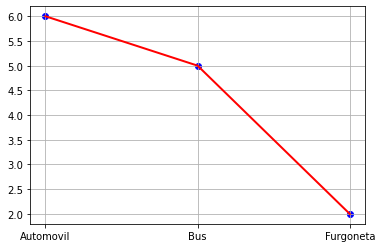

In [15]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportun

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

Finalmente generar las simulaciones para el pico de atencion de R0 calculado y R0 predecido la siguiente semana.
- infectados actual 390
- Media provincia Los Rios 145.5
- Mediana provincia Los Rios 150.28
- R0=3.316

In [ ]:
import simpy 
import random
import numpy as np

import matplotlib.pyplot as pp
%matplotlib inline

#PARAMETROS
HOSPITALES=2
TASA_CRECIMIENTO=137
INFECTADOS=390
HOSPITAL_CAMA_A=106 #HOSPITAL MARTIN ICAZA 106 total ocupadas regularmente 71
HOSPITAL_CAMA_B=71 #Hospital Cantonal Sagrado Corazón de Jesús
CONSULTORIO_HOSPITAL_A=5
CONSULTORIO_HOSPITAL_B=3
DIAS_SIMULACION = 20
DIAS_INTERNADO = 10

#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}
# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}
personas_atendidas=[]
personas_sin_atender=[]
tiempoatencion=[]

class Hospital(object):
    def __init__(self,env,num_cama,name,num_consultorio):
        self.env=env
        self.num_cama=num_cama
        self.camas=simpy.Resource(env,num_cama)
        self.consultorio=simpy.Resource(env,num_consultorio)
        self.name=name
        #self.tiempo_llegada=tiempo_llegada
        
    def triaje(self,paciente,tipo,tiempo):
        print('consultorio disponible en el hospital ',self.name)
       # tiempo[paciente] = env.now
        tipo_paciente=""
        if(tipo==1):
            tipo_paciente='niño'
            #print('llega niño')
            yield self.env.timeout(random.uniform(0.015, 0.030) ) #tiempo de espera por la sala
           # tiempo_sala1.append(self.env.now-tiempo[paciente])
        elif(tipo == 2):
            tipo_paciente='adolecente'
            #print('llega adolecente')
            yield self.env.timeout(random.uniform(0.025, 0.040) )
        elif(tipo == 3):
            tipo_paciente='adulto'
            #print('llega adulto')
            yield self.env.timeout(random.uniform(0.030, 0.055) )
        else:
            tipo_paciente='adulto mayor'
            #print('llega tercera edad')
            yield self.env.timeout(random.uniform(0.015, 0.030) )
            
        print("El paciente ", paciente, 'de tipo',tipo_paciente," fue atendido en : ", self.env.now-tiempo[paciente], "  en el hospital  ", self.name)
        
    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        tiempoatencion.append(tiempo[paciente]-self.env.now)
        print("El paciente se termino de atender: ", paciente, " tiempo de salida: ", self.env.now, " hospital ", self.name)


    
    
    

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    atencion={}
    with hospital.consultorio.request() as consultorio:
        ##tipo de paciente 
        tipo= random.randint(1,4)
        #tiempo[paciente]=env.now+(random.uniform(0.000, 1))
        tiempo[paciente] = env.now

        print("Llega nuevo paciente  : ", paciente, " tipo: ",tipo,' en tiempo:', tiempo[paciente])
        requerimiento = yield consultorio | env.timeout(1)
        if consultorio in requerimiento:
            #print("Al paciente es atendido")
            atencion[paciente]='si'
            #print('consultorio ',consultorio.)
            yield env.process(hospital.triaje(paciente,tipo,tiempo))

        else:
            atencion[paciente]='no'
           
                

            
           
            
            
    if(atencion[paciente]=='si' ) :
        personas_atendidas.append(paciente)
        estado = random.randint(1,100)
        if (estado < 60):
             with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,5)
                    requerimiento = yield cama | env.timeout(dias_esperando)
                    #print('\t paciente requiere diagnostico')
                    wait = env.now - arrive
                    if cama in requerimiento:
                        print("\t ee Al paciente: ", paciente, " se le asigna una CAMA ", " hospital " , hospital.name)
                        yield env.process(hospital.ingresar_paciente(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if round(env.now) in persona_fallecidas else  1
                        else:
                            persona_recuperadas[round(env.now)] = persona_recuperadas[round(env.now)] + 1 if round(env.now) in persona_recuperadas else 1
                    else:
                        print("\t ew El paciente " , paciente, " en el hospital ", hospital.name, " espero ", wait , " dias y fallece no hay camas")
                        persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if round(env.now) in persona_fallecidas else  1    
           
        else :
            print("\t El paciente ",paciente,"no tiene COVID.")
       
    else:
        muerte=random.randint(0,1)
        if(muerte==0):
            print('muere sin ser atendido',round(env.now),'.')
         
        
            persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if round(env.now) in persona_fallecidas else  1
  

        else:
                #tiene posivilidad de vivir
            pass
            
        personas_sin_atender.append(paciente)
        print('paciente :',paciente,'no fue atendido en el dia')

    
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_CAMA_A, "A",CONSULTORIO_HOSPITAL_A)
    hospitalB = Hospital(env, HOSPITAL_CAMA_B, "B",CONSULTORIO_HOSPITAL_B)
    for i in range(infectados):
         asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        print('siguente dia',env.now)
        for i in range(tasa_crecimiento):
            
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)
        

    
def asignar_hospital(env, hospitalA, hospitalB, paciente):
    hosp_esc = random.randint(1,2)

    if (hosp_esc == 1):
       
       # print("Llega paciente nuevo : ", paciente, " hospital A tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalA, paciente))
    else:
       # print("Llega paciente nuevo : ", paciente, " hospital B tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalB, paciente))
        

print("Simulacion COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)
print()




datos=sorted(persona_recuperadas.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)

pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas Recuperadas")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico

print("Resultados pacientes :")
print("Recuperados: ")
print(persona_recuperadas)
print("Fallecidos: ")
print(persona_fallecidas)

print('Tiempo promedio total que requiere un paciente para ser atendido desde cero.',abs(np.mean(tiempoatencion)))
print('total pacientes atendidos',len(personas_atendidas))
print('total pacientes sin atender',len(personas_sin_atender),'los cuales pudieron morir y estan contabilizados conjunto con muertos')
print('total pacientes muertos',sum(y))


## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 